<a href="https://colab.research.google.com/github/sreekar-pasumarthi/Deep-Learning-Projects/blob/master/sparse_NNla1s_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1OK5fU6PhXSTB-W0a7dJsfyEj7g0uXYha'
downloaded = drive.CreateFile({'id': file_id})

In [0]:
downloaded.GetContentFile('la1s.wc.csv')

In [5]:
df_train=pd.read_csv('la1s.wc.csv')
print(f'The train set contain {df_train.shape[0]} examples')
print(f'The train set contain {df_train.shape[1]} features')
df_train.head()

The train set contain 3203 examples
The train set contain 13196 features


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.13125,0.13126,0.13127,0.13128,0.13129,0.13130,0.13131,0.13132,0.13133,0.13134,0.13135,0.13136,0.13137,0.13138,0.13139,0.13140,0.13141,0.13142,0.13143,0.13144,0.13145,0.13146,0.13147,0.13148,0.13149,0.13150,0.13151,0.13152,0.13153,0.13154,0.13155,0.13156,0.13157,0.13158,0.13159,0.13160,0.13161,0.13162,0.13163,Financial
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Financial
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Financial
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Foreign
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,National
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,National


In [0]:
X_train = df_train.drop('Financial', axis = 1)#drops the column type from the dataframe
y_train = df_train['Financial']

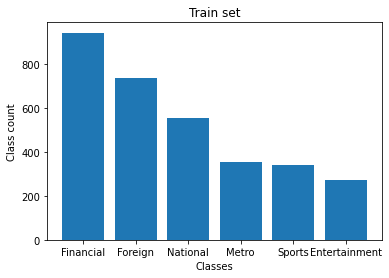

In [20]:
classes = y_train.unique()#no. of classes 
values = y_train.value_counts()#occurrence of each class

plt.bar(classes, values)
plt.title('Train set')
plt.xlabel('Classes')
plt.ylabel('Class count')
plt.show()

In [21]:
X_train.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.13124,0.13125,0.13126,0.13127,0.13128,0.13129,0.13130,0.13131,0.13132,0.13133,0.13134,0.13135,0.13136,0.13137,0.13138,0.13139,0.13140,0.13141,0.13142,0.13143,0.13144,0.13145,0.13146,0.13147,0.13148,0.13149,0.13150,0.13151,0.13152,0.13153,0.13154,0.13155,0.13156,0.13157,0.13158,0.13159,0.13160,0.13161,0.13162,0.13163
count,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,...,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.00000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.00000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000
mean,0.004059,0.011552,0.038714,0.001249,0.029660,0.008742,0.002498,0.001873,0.029035,0.001249,0.001561,0.001561,0.002185,0.002498,0.012800,0.001249,0.002498,0.001561,0.002185,0.006869,0.045270,0.001873,0.102404,0.001561,0.016235,0.006244,0.044021,0.002498,0.011552,0.003122,0.013737,0.001873,0.004995,0.014674,0.003746,0.003122,0.018732,0.000937,0.006556,0.003122,...,0.001249,0.020918,0.012488,0.050890,0.004059,0.002498,0.006556,0.001873,0.001249,0.002185,0.001249,0.001249,0.003746,0.001873,0.001873,0.00281,0.003122,0.001873,0.005620,0.000937,0.001873,0.002810,0.010303,0.004371,0.001873,0.001561,0.001249,0.001249,0.001249,0.002185,0.001873,0.004059,0.024040,0.00843,0.000937,0.004059,0.000937,0.002185,0.001561,0.008742
std,0.126139,0.128135,1.001435,0.035322,0.209236,0.231603,0.049922,0.043247,0.341900,0.035322,0.058591,0.039485,0.046705,0.061167,0.299111,0.043270,0.078993,0.039485,0.063680,0.093260,0.238696,0.043247,0.364925,0.058591,0.153204,0.099774,0.625003,0.049922,0.474382,0.070620,0.159437,0.043247,0.086431,0.139498,0.061103,0.086519,0.150863,0.030595,0.080718,0.086519,...,0.035322,0.423984,0.121797,0.334702,0.088267,0.055828,0.118367,0.049949,0.035322,0.046705,0.035322,0.043270,0.122379,0.049949,0.043247,0.07698,0.070620,0.043247,0.108793,0.030595,0.055853,0.080935,0.130654,0.086465,0.061189,0.046730,0.043270,0.035322,0.043270,0.046705,0.049949,0.084655,0.237852,0.18431,0.030595,0.126139,0.030595,0.068409,0.039485,0.296637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [14]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
Y_train = np_utils.to_categorical(encoded_Y)
Y_train.shape

(3203, 6)

In [0]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(10, input_dim=13195, activation='relu'))
	model.add(Dense(6, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [0]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=32, verbose=2)
kfold = KFold(n_splits=5, shuffle=True)

In [35]:
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/20
 - 1s - loss: 1.0732 - accuracy: 0.6928
Epoch 2/20
 - 1s - loss: 0.4489 - accuracy: 0.9137
Epoch 3/20
 - 1s - loss: 0.2593 - accuracy: 0.9684
Epoch 4/20
 - 1s - loss: 0.1621 - accuracy: 0.9906
Epoch 5/20
 - 1s - loss: 0.1078 - accuracy: 0.9945
Epoch 6/20
 - 1s - loss: 0.0756 - accuracy: 0.9965
Epoch 7/20
 - 1s - loss: 0.0549 - accuracy: 0.9973
Epoch 8/20
 - 1s - loss: 0.0409 - accuracy: 0.9984
Epoch 9/20
 - 1s - loss: 0.0316 - accuracy: 0.9988
Epoch 10/20
 - 1s - loss: 0.0248 - accuracy: 0.9996
Epoch 11/20
 - 1s - loss: 0.0199 - accuracy: 1.0000
Epoch 12/20
 - 1s - loss: 0.0162 - accuracy: 1.0000
Epoch 13/20
 - 1s - loss: 0.0134 - accuracy: 1.0000
Epoch 14/20
 - 1s - loss: 0.0112 - accuracy: 1.0000
Epoch 15/20
 - 1s - loss: 0.0095 - accuracy: 1.0000
Epoch 16/20
 - 1s - loss: 0.0081 - accuracy: 1.0000
Epoch 17/20
 - 1s - loss: 0.0070 - accuracy: 1.0000
Epoch 18/20
 - 1s - loss: 0.0061 - accuracy: 1.0000
Epoch 19/20
 - 1s - loss: 0.0053 - accuracy: 1.0000
Epoch 20/20
 - 1s - l